In [9]:
# 1. IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
# 2. READING THE DATA
salary=pd.read_csv('Employee_Salary.csv')

In [3]:
# 3. UNDERSTANDING THE DATA
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [4]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


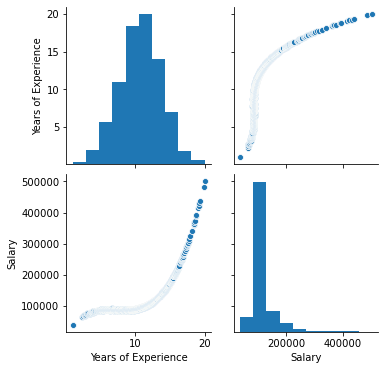

In [5]:
# 4. VISUALIZE THE DATA
sns.pairplot(salary)

In [10]:
# 5. TEST TRAIN SPLIT
X=salary[['Years of Experience']]
y=salary['Salary']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [11]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print(f'Linear Model Coeff m:{lin_reg.coef_}')
print(f'Linear Model Coeff c:{lin_reg.intercept_}')

Linear Model Coeff m:[11713.90124712]
Linear Model Coeff c:-13843.362983505882


In [12]:
y_predict_lin_reg=lin_reg.predict(X_test)

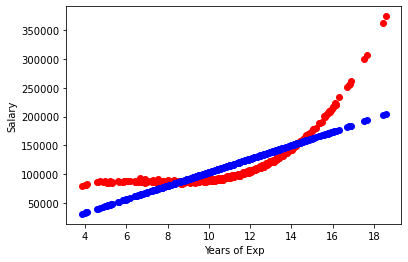

In [13]:
plt.scatter(X_test,y_test, color='red')
plt.scatter(X_test,y_predict_lin_reg, color='blue')
plt.ylabel('Salary')
plt.xlabel('Years of Exp')
plt.show()

In [14]:
poly=PolynomialFeatures(degree=2)
X_column_train=poly.fit_transform(X_train)
regressor=LinearRegression()
regressor.fit(X_column_train,y_train)

LinearRegression()

In [15]:
print(f'Polynomial Reg Coeff: {regressor.coef_}')
print(f'Polynomial Reg Constant: {regressor.intercept_}')

Polynomial Reg Coeff: [     0.         -32653.27391759   2084.28020328]
Polynomial Reg Constant: 203558.85587900912


In [16]:
y_predict_poly=regressor.predict(poly.transform(X_test))

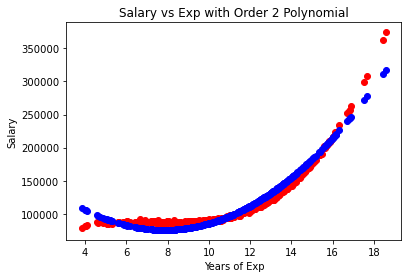

In [17]:
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_predict_poly,color='blue')
plt.ylabel('Salary')
plt.xlabel('Years of Exp')
plt.title('Salary vs Exp with Order 2 Polynomial')
plt.show()

In [18]:
poly=PolynomialFeatures(degree=5)
X_column_train=poly.fit_transform(X_train)
regressor=LinearRegression()
regressor.fit(X_column_train,y_train)

LinearRegression()

In [19]:
print(f'Polynomial Reg Coeff: {regressor.coef_}')
print(f'Polynomial Reg Constant: {regressor.intercept_}')

Polynomial Reg Coeff: [ 0.00000000e+00  3.27993995e+04 -4.67034604e+03  2.26608037e+02
 -1.20880120e+00  2.49133094e-02]
Polynomial Reg Constant: 11599.166537930185


In [20]:
y_predict_poly=regressor.predict(poly.transform(X_test))

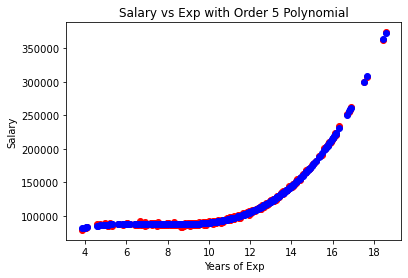

In [21]:
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_predict_poly,color='blue')
plt.ylabel('Salary')
plt.xlabel('Years of Exp')
plt.title('Salary vs Exp with Order 5 Polynomial')
plt.show()